In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator, statevector_simulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# Honest Random Number Generator with Qiskit
### So one of biggest (non)issue is the idea of randomness in computation. What does it actually mean to be random? In normal computers sudo-random number generators are used which rely on things like the time and date. But these things are not actually random. That is, given the initial conditions (ie: date/time) and the generation algorithm we could reproduce the 'random' number. This is a reversible process which means we can work our way back. Now I am going to try create a quantum number generator which relys on the irreversibility of quantum measurement and superposition to get me a salt of the earth, honest, random number. 

(Note that I have to simulate this classically due to IBM hogging their quantum computer)

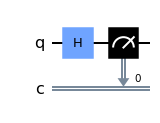

In [42]:
# Create Circuit
qc = QuantumCircuit(1,1)

# Apply H-gate to the first: Creating superposition
qc.h(0)

# Measure to retrieve a binary answer to our question
qc.measure(0,0)

qc.draw()

['0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0']


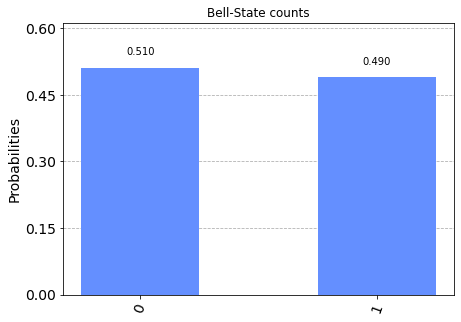

In [43]:
# Using Aer simulator: closest to the real thing
simulator = Aer.get_backend('aer_simulator')
qobj = assemble(qc)

# Simulate for 100 shots while retaining memory
result = simulator.run(qc, shots=100, memory=True).result()

# This memory can be used as a random bitstring sequence
memory = result.get_memory(qc)
print(memory)

# Displaying histogram
counts = result.get_counts(qc)
plot_histogram(counts, title='Bell-State counts')

In [4]:
"""Function will return a random decimal with precision base 2 of 'Lenght'"""

def rnd_num(lenght): # lenght is in base 2
    
    # Create Circuit & superposition
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.measure(0,0)

    # Simulate and get memory
    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(qc, shots=lenght, memory=True).result()
    memory = result.get_memory(qc)
    
    bitstring = ''
    for bit in memory: bitstring += bit
    
    decimal = int(bitstring,2) / ( 10**( len( str( int( bitstring,2) ) ) ) )
    
    return bitstring, decimal

In [7]:
for i in range(1,11): print(rnd_num(i))

('1', 0.1)
('01', 0.1)
('111', 0.7)
('0011', 0.3)
('01000', 0.8)
('001000', 0.8)
('1101111', 0.111)
('01010110', 0.86)
('110101010', 0.426)
('1111000101', 0.965)


Funny how these random numbers dont feel any different to sudo random numbers